In [1]:
# Make sure you are using a GPU runtime for this notebook
# To do this, go to Runtime -> Change runtime type -> Hardware accelerator -> GPU

# Clone the official Real-ESRGAN repository
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN

# Install dependencies with a fix for compatibility issues
# We install basicsr from a specific commit to avoid errors
!pip install git+https://github.com/XPixelGroup/BasicSR.git
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 759, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 759 (delta 106), reused 99 (delta 99), pack-reused 638 (from 1)
Receiving objects: 100% (759/759), 5.38 MiB | 28.99 MiB/s, done.
Resolving deltas: 100% (415/415), done.
/content/Real-ESRGAN
  Cloning https://github.com/XPixelGroup/BasicSR.git to /tmp/pip-req-build-epbjv9xl
  Running command git clone --filter=blob:none --quiet https://github.com/XPixelGroup/BasicSR.git /tmp/pip-req-build-epbjv9xl
  Resolved https://github.com/XPixelGroup/BasicSR.git to commit 8d56e3a045f9fb3e1d8872f92ee4a4f07f886b0a
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1

In [2]:
import os
from google.colab import files
import shutil

# Define the folders for uploading and results
upload_folder = 'upload'
result_folder = 'results'

# Clear out any old files from previous runs
if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)

# Create the folders again
os.mkdir(upload_folder)
os.mkdir(result_folder)

# Upload your image(s)
uploaded = files.upload()

# Move the uploaded files to the upload folder
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'Moving {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving library.webp to library.webp
Moving library.webp to upload/library.webp


In [3]:
# Run the upscaling process
# You can adjust the --outscale factor as needed
# Add the --face_enhance flag to improve faces
!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 4 --face_enhance

Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth" to /content/Real-ESRGAN/weights/RealESRGAN_x4plus.pth

100% 63.9M/63.9M [00:00<00:00, 127MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /content/Real-ESRGAN/gfpgan/weights/detection_Resnet50_Final.pth

100% 104M/104M [00:01<00:00, 70.9MB/s] 
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.2.2/parsin

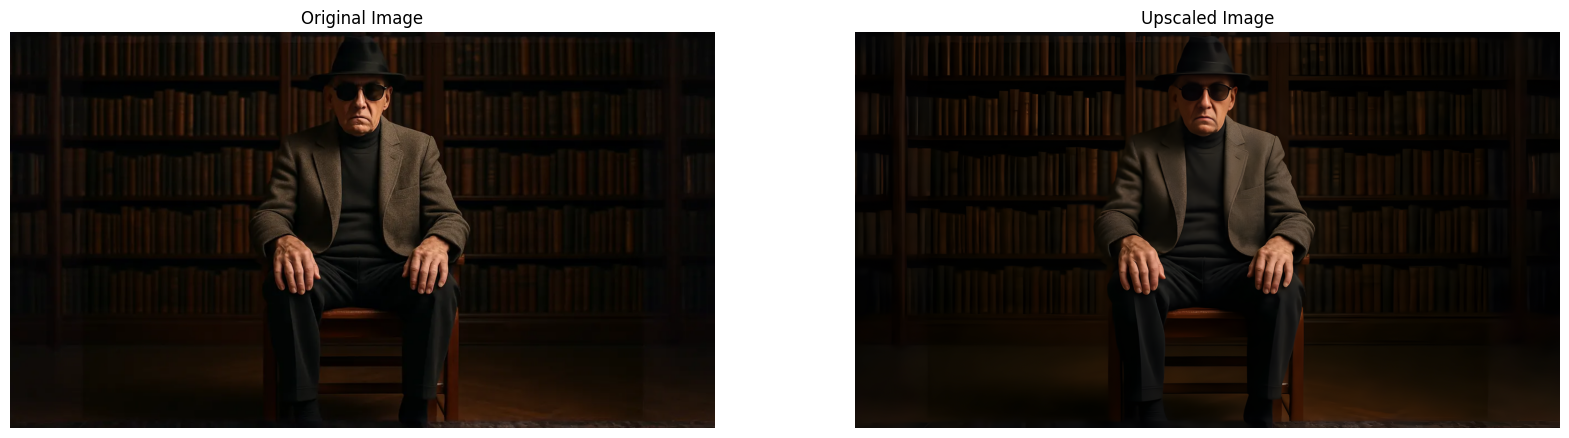

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import cv2
import matplotlib.pyplot as plt
import os
import glob

# Get the path of the first uploaded image and its corresponding result
try:
    original_img_path = glob.glob('upload/*')[0]
    upscaled_img_path = glob.glob('results/*')[0]

    # Read the images
    original_img = cv2.cvtColor(cv2.imread(original_img_path), cv2.COLOR_BGR2RGB)
    upscaled_img = cv2.cvtColor(cv2.imread(upscaled_img_path), cv2.COLOR_BGR2RGB)

    # Display the images for comparison
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    ax[0].imshow(original_img)
    ax[0].set_title("Original Image")
    ax[0].axis('off')

    ax[1].imshow(upscaled_img)
    ax[1].set_title("Upscaled Image")
    ax[1].axis('off')
    plt.show()

    # Download the upscaled image
    print(f"Downloading the result: {os.path.basename(upscaled_img_path)}")
    from google.colab import files
    files.download(upscaled_img_path)

except IndexError:
    print("Could not find images to display. Please ensure steps 2 and 3 ran correctly.")